In [2]:
####Data Source : (https://www.kaggle.com/rohitsahoo/sales-forecasting)

#OBJECTIVES TO FIND 

##What is the overall trend of the sales?
##What are the top 10 products by sales?
##What are the most selling products?
##What is the most preferred Ship Mode?
##Which are the most profitable category and Sub-category?



#Libraries
    
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import os
import time
from itertools import product
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

In [3]:
data = pd.read_csv('C:/Users/kruna/Downloads/train.csv')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
data.shape

(9800, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
#Find the unique values
data.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [8]:
#Find total sum of null values
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
#Remove NA/null values 
data = data.dropna()

In [10]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [12]:
###Multi-table analysis of the data to help summarise the data fast.

from IPython.core.display import HTML

def multi_table(table_list):
    ''' Accepts a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [13]:
data_nunique = {var: pd.DataFrame(data[var].value_counts()) 
              for var in {'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'}}

In [14]:
#Summarise the data 
multi_table([data_nunique['Order ID'],data_nunique['Order Date'],data_nunique['Ship Date'],
            data_nunique['Ship Mode'],data_nunique['Customer ID'],data_nunique['Customer Name'],data_nunique['Segment'],
            data_nunique['Country'],data_nunique['City'],data_nunique['State'],data_nunique['Postal Code'],data_nunique['Region'],
            data_nunique['Product ID'],data_nunique['Category'],data_nunique['Sub-Category'],data_nunique['Product Name'],data_nunique['Sales']])

,Order ID
CA-2018-100111,14
CA-2018-157987,12
CA-2017-165330,11
US-2017-108504,11
CA-2017-105732,10
...,...
US-2015-161613,1
CA-2018-101728,1
CA-2017-112942,1
CA-2018-126438,1


In [14]:
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
LINEWIDTH=2
ALPHA=.6

data = data[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales']].copy()

# Extract the year and the month from the date column into indepedent columns
data['Order Date']  = pd.to_datetime(data['Order Date'])
data['year_month']  = data['Order Date'].apply(lambda x : x.strftime('%Y-%m'))
data['year']  = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year_month,year,month
0,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08,2017,8
1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08,2017,8
2,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12,2017,12
3,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11,2016,11
4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017-05,2017,5
9796,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016-12,2016,12
9797,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016-12,2016,12
9798,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016-12,2016,12


In [15]:
#Investigating the trend of the sale and Grouping the data to get monthly sales.
data_trend = data.groupby(['year','month']).sum()['Sales'].reset_index()

In [16]:
data_trend.head()

,year,month,Sales
0,2015,1,28828.254
1,2015,2,12588.484
2,2015,3,54027.692
3,2015,4,24710.016
4,2015,5,29520.490


In [17]:
data_trend[data_trend.year==2015]

,year,month,Sales
0,2015,1,28828.2540
1,2015,2,12588.4840
2,2015,3,54027.6920
3,2015,4,24710.0160
4,2015,5,29520.4900
5,2015,6,29181.3346
6,2015,7,35194.5580
7,2015,8,37349.2655
8,2015,9,65956.3998
9,2015,10,34561.9470


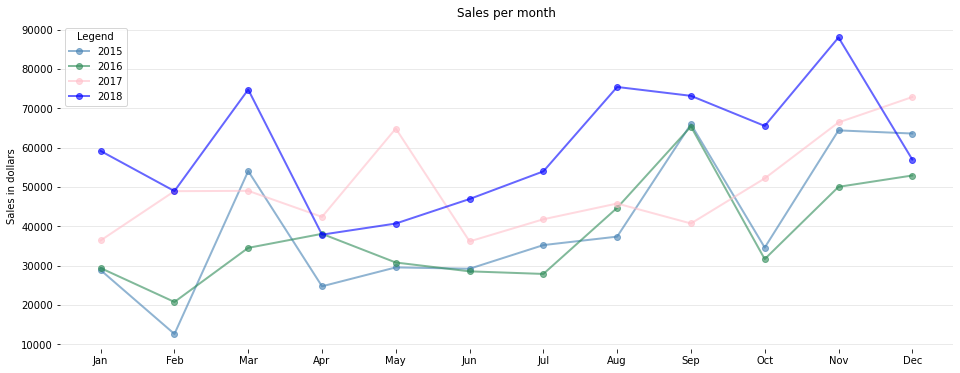

In [18]:
##Sales Per Month for Each Year Since 2015 - 2018

plt.figure(figsize=(16,6))
# Plot the sales of the year 2013
plt.plot(MONTHS, data_trend[data_trend.year==2015].Sales, '-o', color='steelblue', linewidth=LINEWIDTH, alpha=ALPHA,label='2015')
plt.plot(MONTHS, data_trend[data_trend.year==2016].Sales, '-o', color='seagreen', linewidth=LINEWIDTH, alpha=ALPHA,label='2016')
plt.plot(MONTHS, data_trend[data_trend.year==2017].Sales, '-o', color='pink', linewidth=LINEWIDTH, alpha=ALPHA,label='2017')
plt.plot(MONTHS, data_trend[data_trend.year==2018].Sales, '-o', color='blue', linewidth=LINEWIDTH, alpha=ALPHA,label='2018')

ax = plt.gca()
ax.set_title('Sales per month')
ax.set_ylabel('Sales in dollars')
ax.grid(axis='y', color='gray', alpha=.2)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend(loc=2, title='Legend')
plt.show()

In [19]:
##Top 10 products getting higher Sales.
Product_Sales=pd.DataFrame(data.groupby('Product Name').sum()['Sales'])

In [20]:
Product_Sales.head()

,Sales
Product Name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",379.214
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672


In [21]:
Sorted_Prod=Product_Sales.sort_values('Sales',ascending=False)

<AxesSubplot:title={'center':'Top 10 products by sales'}, xlabel='Product Name'>

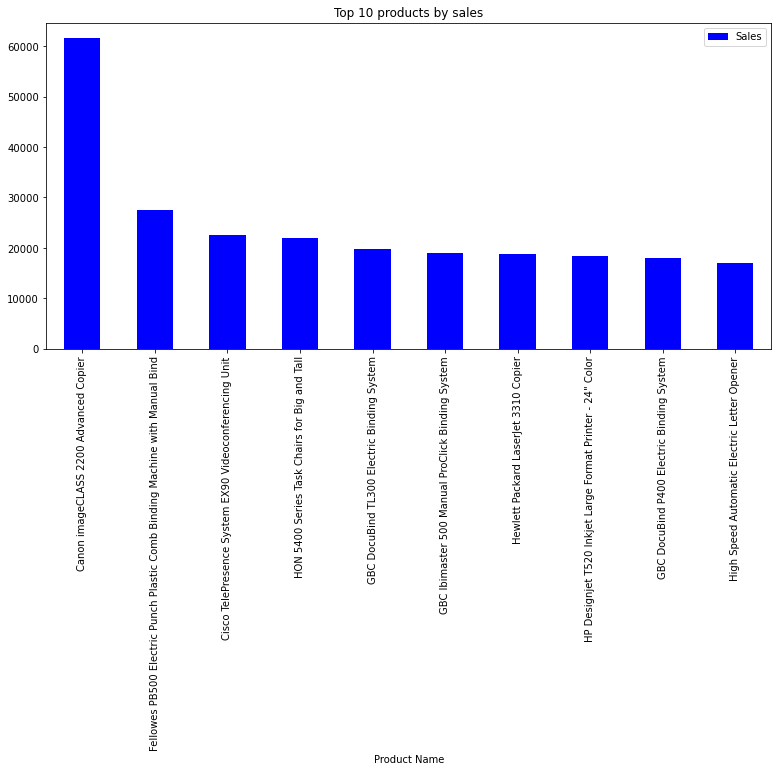

In [22]:
Sorted_Prod[:10].plot(kind='bar',figsize=(13,6),color='blue',title = 'Top 10 products by sales')

C:\Users\kruna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

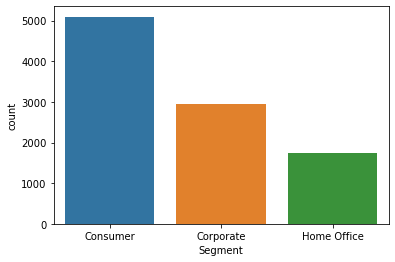

In [23]:
#Most Performaing Segments

sns.countplot(data['Segment'])

C:\Users\kruna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

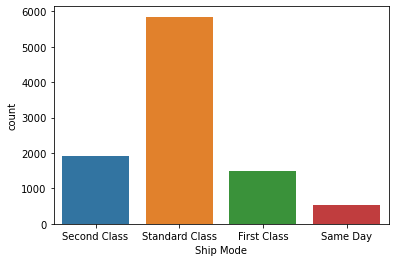

In [24]:
#Most prefered Shipmode
sns.countplot(data['Ship Mode'])

In [26]:
##Most Sold products per State
STATE=pd.DataFrame(data.groupby(['State','Product Name']).sum()['Sales'])

In [27]:
STATE

Sales
State     Product Name                                                
Alabama   1.7 Cubic Foot Compact "Cube" Office Refrigerators   208.160
          14-7/8 x 11 Blue Bar Computer Printout Paper          96.080
          AT&T 17929 Lendline Telephone                         90.480
          Acme Stainless Steel Office Snips                      7.270
          Acrylic Self-Standing Desk Frames                     21.360
...                                                                ...
Wisconsin Xerox 1917                                           195.640
          Xerox 1940                                           219.840
          Xerox 205                                             51.840
          Xerox 217                                             45.360
Wyoming   Global Troy Executive Leather Low-Back Tilter       1603.136

[8066 rows x 1 columns]

In [28]:
Sorted_STATE=STATE.sort_values('Sales',ascending=False)

<AxesSubplot:xlabel='State,Product Name'>

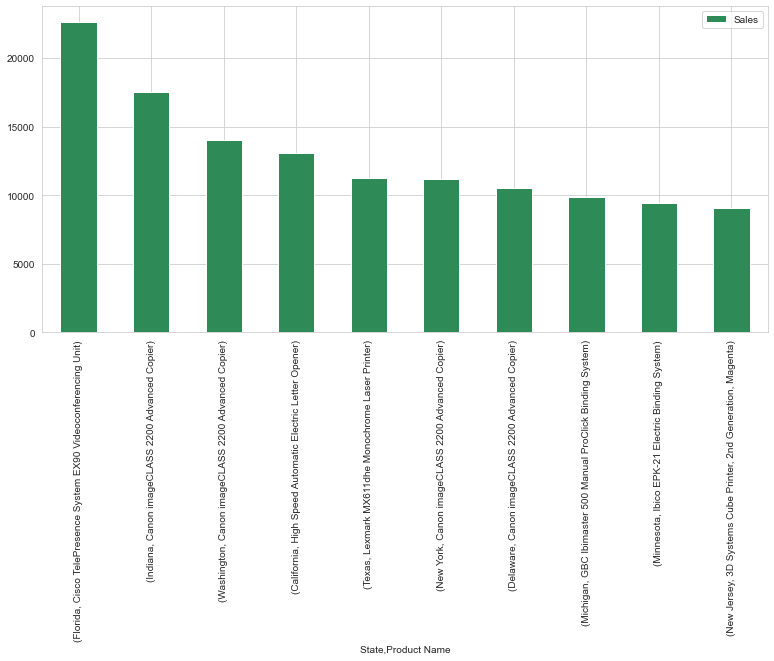

In [125]:
Sorted_STATE[:10].plot(kind='bar',figsize=(13,6),color='seagreen')

<AxesSubplot:title={'center':'Most Profitable Categories and Sub-categories'}, xlabel='Category,Sub-Category'>

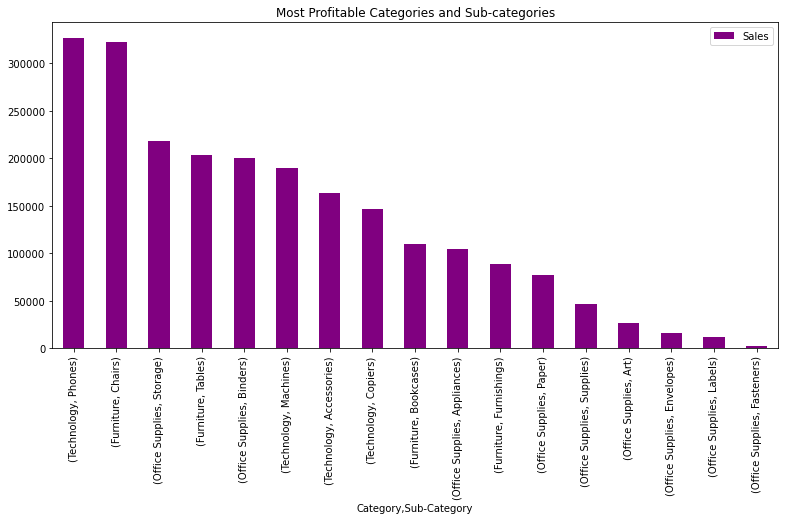

In [39]:
#Most Profitable Categories and Sub-categories

Categ_and_Sub=pd.DataFrame(data.groupby(['Category','Sub-Category']).sum()['Sales'])
Sorted_Categs=Categ_and_Sub.sort_values('Sales', ascending=False)
Sorted_Categs.plot(kind='bar',figsize=(13,6),color='purple',title ='Most Profitable Categories and Sub-categories')

In [130]:
#Most Profitable Categories and Sub-categories per State
Categ_and_Sub2=pd.DataFrame(data.groupby(['Category','Sub-Category','State']).sum()['Sales'])
Categ_and_Sub2

Sales
Category   Sub-Category State                  
Furniture  Bookcases    Arizona        519.2130
                        Arkansas       638.8200
                        California   26875.1895
                        Colorado      1583.5230
                        Connecticut   1682.7400
...                                         ...
Technology Phones       Texas        28589.5680
                        Utah           615.2240
                        Virginia     10649.5000
                        Washington    9101.5680
                        Wisconsin     3705.1300

[645 rows x 1 columns]

<AxesSubplot:xlabel='Category,Sub-Category,State'>

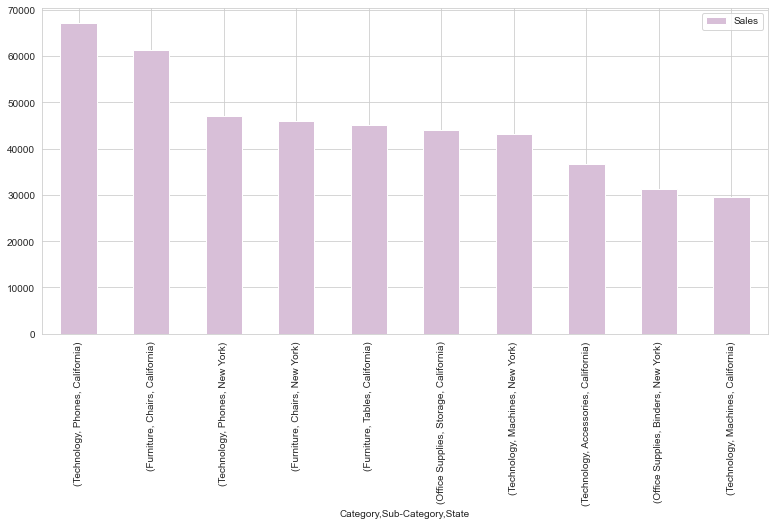

In [131]:
Sorted_Categs2=Categ_and_Sub2.sort_values('Sales', ascending=False)
Sorted_Categs2=Sorted_Categs2[:10]
Sorted_Categs2.plot(kind='bar',figsize=(13,6),color='thistle')